<a href="https://colab.research.google.com/github/StevTobs/TimeSeries_Python/blob/master/Time_Series_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Code

In [15]:
#--------installation in Colab -----------
!pip install -U -q PyDrive #for load data from google drive with PyDrive

In [16]:

#Authenticate and create the PyDrive client. 
def Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id ):

  from pydrive.auth import GoogleAuth 
  from pydrive.drive import GoogleDrive 
  from google.colab import auth 
  from oauth2client.client import GoogleCredentials 
  from google.colab import files
  #Authenticate and create the PyDrive client. 
  auth.authenticate_user() 
  gauth = GoogleAuth() 
  gauth.credentials = GoogleCredentials.get_application_default() 
  drive = GoogleDrive(gauth) 
  your_module = drive.CreateFile({'id':PATH_googleDrive_id}) 
  your_module.GetContentFile( PATH_googleDrive )
  #------------------------ 

In [38]:
import pandas as pd
#some version do not support plotting in line of Matplotlib
%matplotlib inline 

# Time series with Pandas
Table of Contents
   * [DataTime Index Basic](#DataTimeIndexBasic)
   * [Time Resapling](#TimeResapling)
    - Time Shifting
    - Rolling and Expanding
    - Time Series Visualization
    - Time Series Project Exercise
    
    


## DataTime Index Basic <a class="anchor" id="DataTimeIndexBasic"></a>

In [ ]:
# None Pandas

In [ ]:
from datetime import datetime

In [ ]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

Create **datetime object**

In [ ]:
#shift tab
my_date = datetime(my_year, my_month, my_day)

In [ ]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [ ]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [ ]:
#tab
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [ ]:
my_date_time.day

2

In [ ]:
my_date_time.hour

13

In [ ]:
type(my_date_time)

datetime.datetime

In [ ]:
import numpy as np

In [ ]:
# Just string
np.array(['200-03-15','2020-03-16','2020-03-17'])

array(['200-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [ ]:
# Datetime object specification
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64') #means 64bit
#D is day

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [ ]:
np.array(['200-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]') #Y is day

array(['0200', '2020', '2020'], dtype='datetime64[Y]')

In [ ]:
np.array(['200-03-15','2020-03-16','2020-03-17'],dtype='datetime64[h]') #h is hour

array(['0200-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [ ]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [ ]:
#apply day step 
np.arange('2018-06-01','2018-06-23',7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [ ]:
#Every data (becareful every hours)
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [ ]:
# DateTime in Pandas

In [ ]:
import pandas as pd

In [ ]:
pd.date_range('2020-01-01',periods=7,freq='D') # ความละเอียดระดับ nano second.

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2/1/2018','3/1/2018'])#UK Style is not working

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2/1/2018','3/1/2018'], format='%d/%m/%Y') #Europion

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2--1--2018','3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[ 0.10495133  1.59207935]
 [-0.49124923  0.55600237]
 [ 0.58519203  0.18345926]]


In [ ]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)

In [ ]:
df

,A,B
2020-01-01,0.104951,1.592079
2020-01-02,-0.491249,0.556002
2020-01-03,0.585192,0.183459


In [ ]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [ ]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [ ]:
df.index.argmax()

2

In [ ]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [ ]:
df.index.argmin()

0


___

## Time Resapling <a class="anchor" id="TimeResapling"></a>

In [4]:
#@title
import pandas as pd

In [5]:
pwd

'/content'

In [ ]:
#--------Colab-----------
# To import from google drive of 'starbick.csv' 
# https://drive.google.com/file/d/11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o/view?usp=sharing 

PATH_googleDrive_id = '11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'
PATH_googleDrive = 'starbucks.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )

In [9]:
PATH = PATH_googleDrive
df = pd.read_csv(PATH, index_col = 'Date')

In [10]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [19]:
df.info()#To see the amout of dta

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [20]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [21]:
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

In [22]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [23]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

__resample()__

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [24]:
# dailt ---> yearly
df.resample(rule='A').mean()
# .max()
# .min()
# .std()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [25]:
def first_day(entry):
    
    # IS THERE AN ENTRY??
    if len(entry) :
        #IF SO, RETURN FIRST ENTRY
        return entry[0]
        

In [26]:
#Apply for seing the first day
#Use apply method for applying your custom function
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [27]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


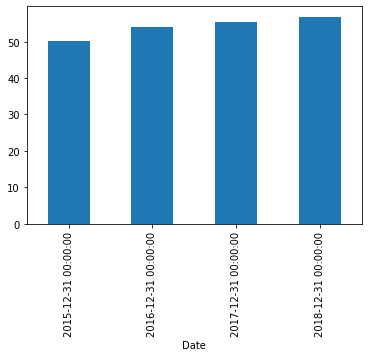

In [28]:
%matplotlib inline
df['Close'].resample('A').mean().plot.bar()

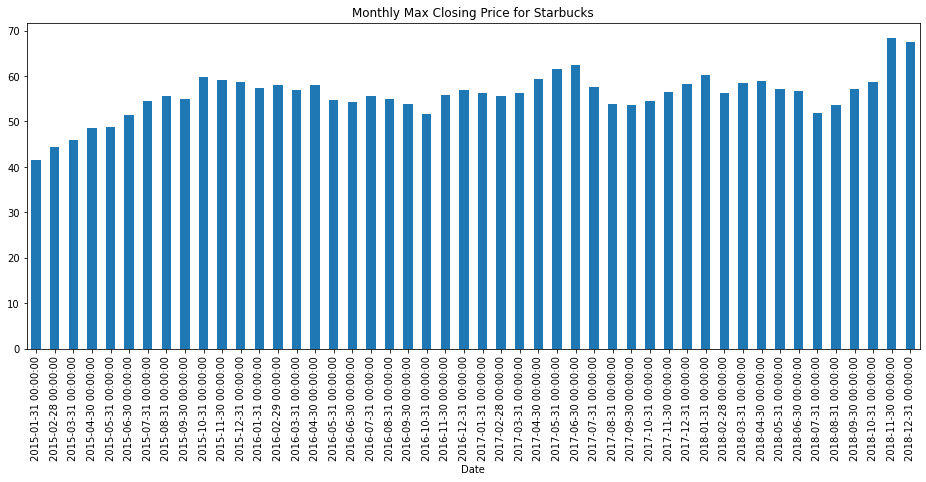

In [31]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title, color='#1f77b4')

## Time Shifting

In [1]:
import pandas as pd

In [19]:
PATH_googleDrive_id = '11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'
PATH_googleDrive = 'starbucks.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )

PATH = PATH_googleDrive
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

### See the last: df.tail()

In [20]:
df.tail() 

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [24]:
df.shift(1).tail() #Shift every row down: 1

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [26]:
df.shift(-1).tail() #Shift every row up: 1

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [30]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [31]:
df.shift(periods=1, freq='M').head(10)

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
2015-01-31,37.2361,27556706
2015-01-31,37.4415,10021486
2015-01-31,37.7401,11040702
2015-01-31,37.5301,9295084


In [33]:
df.shift(1,fill_value=0).head() #If you do not need to fill with n/a, you can specify using fill_value parameter

,Close,Volume
Date,,
2015-01-02,0.0000,0
2015-01-05,38.0061,6906098
2015-01-06,37.2781,11623796
2015-01-07,36.9748,7664340
2015-01-08,37.8848,9732554


## Rolling and Expanding



### Rolling
A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [34]:
import pandas as pd

In [35]:
%matplotlib inline

In [39]:
PATH_googleDrive_id = '11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'
PATH_googleDrive = 'starbucks.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )

PATH = PATH_googleDrive
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

In [40]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


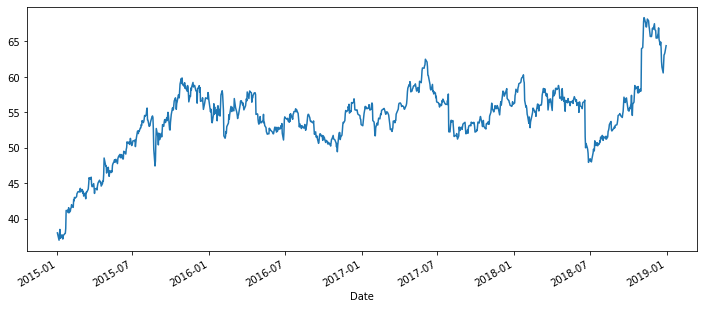

In [41]:
df['Close'].plot(figsize=(12,5))

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [45]:
df.rolling(window=7).mean().head(10) #the 7th will the average of 7 data before including itself

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

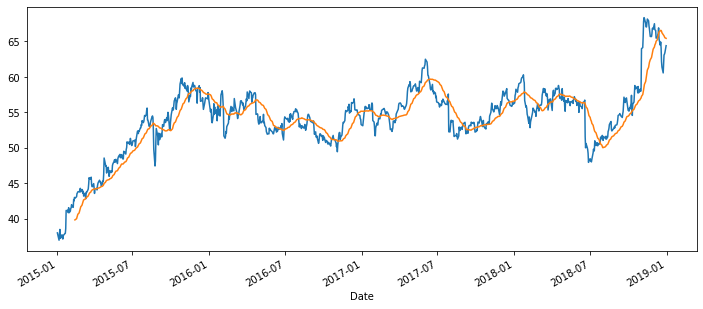

In [47]:
# 30 days rolling
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

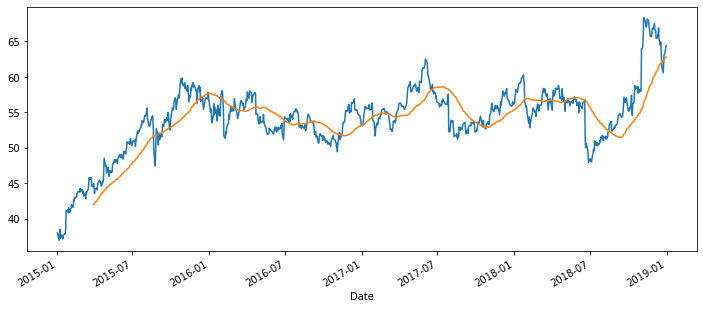

In [48]:
# 60 days rolling
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

In [49]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [51]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


### Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

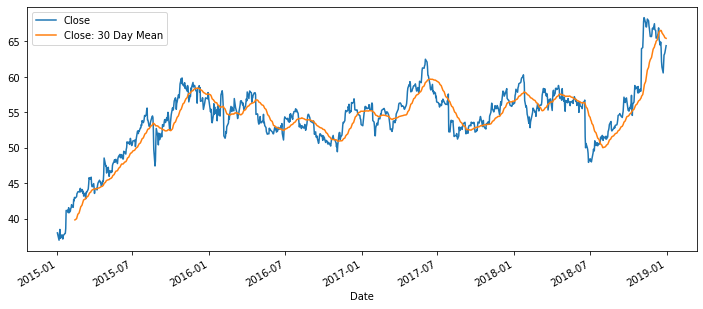

In [54]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

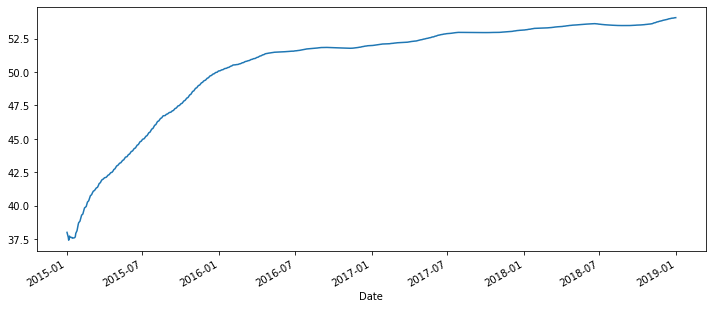

In [57]:
#Average of rolling previous, the last point means the average of all data
#The wingdow keep expanding along with you for whatever up to time expanding up unitil avg. of total column  
df['Close'].expanding().mean().plot(figsize=(12,5))

## Visualizing Time Series Data with Pandas

In [58]:
df.index #This must be DatetimeIndex if it's not, see the next line.

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [60]:
#Convert the index to DatetimeIndex (if not)
df.index = pd.to_datetime(df.index)

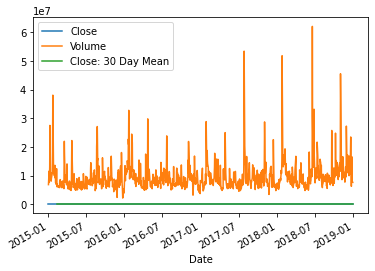

In [62]:
df.plot() #in differnt scale 

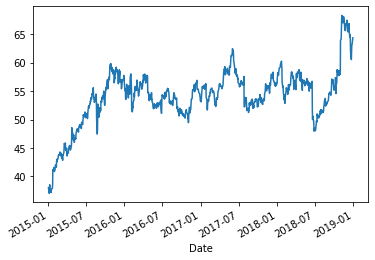

In [63]:
df['Close'].plot()

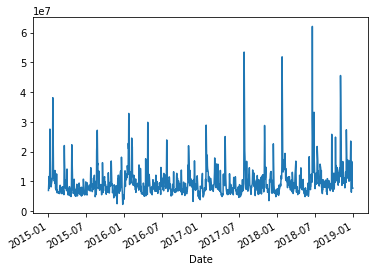

In [64]:
df['Volume'].plot()